<a href="https://colab.research.google.com/github/HackethonHero/Customer-Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd       # For data handling
import numpy as np        # For numerical operations
import matplotlib.pyplot as plt   # For plotting
import seaborn as sns     # For better visualizations
from sklearn.preprocessing import StandardScaler   # To normalize data
from sklearn.cluster import KMeans   # For clustering
import datetime as dt     # For date calculations


In [26]:
df = pd.read_csv('data.csv.zip', encoding='ISO-8859-1')
df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [27]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
display(df.head())

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
snapshot_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'count',
    'TotalAmount': 'sum'
})

rfm.rename(columns={'InvoiceDate':'Recency',
                    'InvoiceNo':'Frequency',
                    'TotalAmount':'Monetary'}, inplace=True)
print("\nRFM Table:")
print(rfm.head())



RFM Table:
            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          2      0.00
12347.0           2        182   4310.00
12348.0          75         31   1797.24
12349.0          19         73   1757.55
12350.0         310         17    334.40


In [29]:
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)


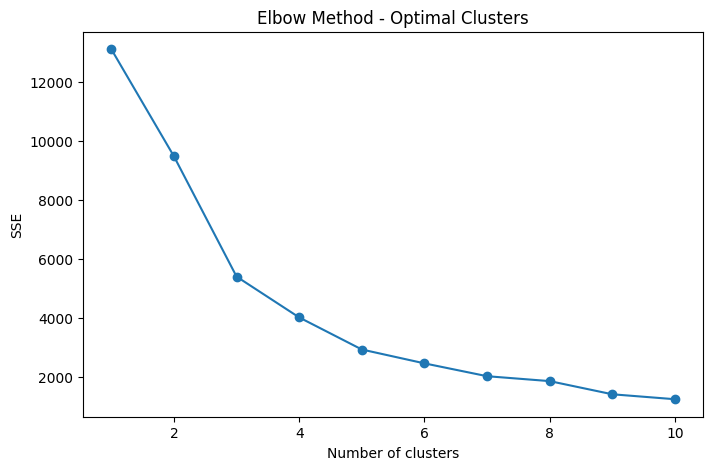

In [30]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("SSE")
plt.title("Elbow Method - Optimal Clusters")
plt.show()


In [31]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
print("\nCluster Counts:")
print(rfm['Cluster'].value_counts())


Cluster Counts:
Cluster
0    3258
1    1103
2       6
3       5
Name: count, dtype: int64


In [32]:
cluster_summary = rfm.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)



Cluster Summary:
            Recency    Frequency       Monetary
Cluster                                        
0         40.027931   105.034377    1994.059792
1        246.567543    27.770626     464.787073
2          1.666667  4821.500000   55039.933333
3          9.000000  1013.400000  192103.854000


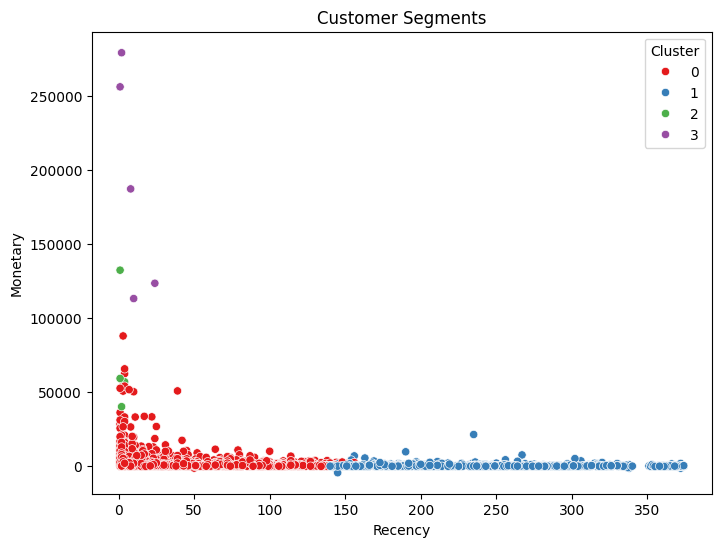

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set1')
plt.title("Customer Segments")
plt.show()


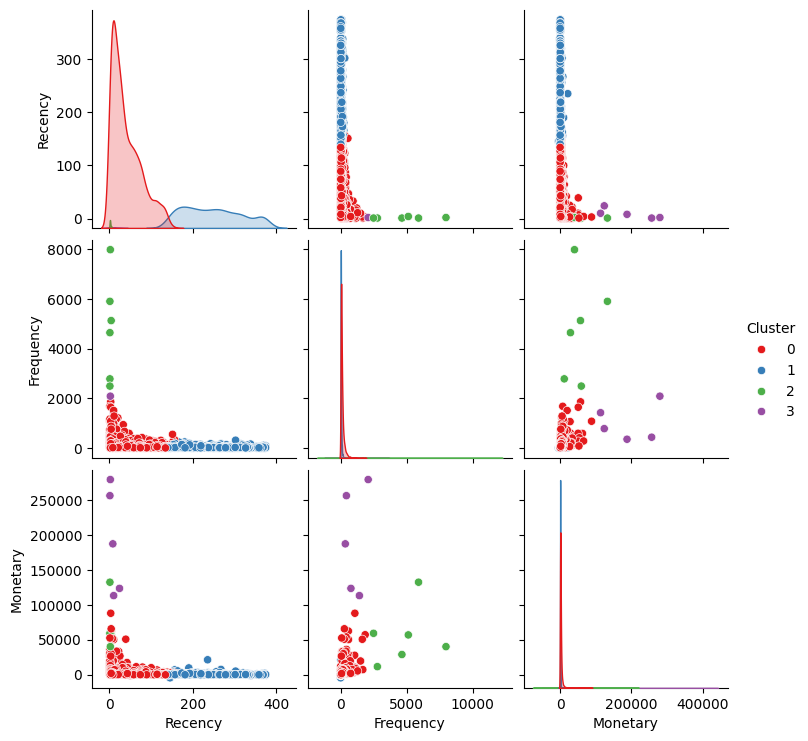

In [34]:
sns.pairplot(rfm, hue='Cluster', vars=['Recency','Frequency','Monetary'], palette='Set1')
plt.show()

In [35]:
rfm.to_csv("customer_segments.csv")
print("Customer Segmentation Completed. Results saved to 'customer_segments.csv'")


Customer Segmentation Completed. Results saved to 'customer_segments.csv'


In [59]:
from google.colab import drive
import os
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Folder where your notebook is saved
project_folder = '/content/drive/MyDrive/ColabProjects/Customer_Segmentation'
os.makedirs(project_folder, exist_ok=True)
# Save CSV
csv_path = os.path.join(project_folder, 'customer_segments.csv')
rfm.to_csv(csv_path, index=False)

# Save scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set1')
plt.title("Customer Segments - Recency vs Monetary")
scatter_path = os.path.join(project_folder, 'scatter_plot.png')
plt.savefig(scatter_path)
plt.close()

# Save pairplot
pairplot = sns.pairplot(rfm, hue='Cluster', vars=['Recency','Frequency','Monetary'], palette='Set1')
pairplot_path = os.path.join(project_folder, 'pairplot.png')
pairplot.fig.savefig(pairplot_path)
plt.close()

print("✅ CSV and plots saved successfully in:", project_folder)


✅ CSV and plots saved successfully in: /content/drive/MyDrive/ColabProjects/Customer_Segmentation


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Folder where your notebook is saved
project_folder = '/content/drive/MyDrive/ColabProjects/Customer_Segmentation'
os.makedirs(project_folder, exist_ok=True)

# Create the pairplot
pairplot = sns.pairplot(rfm, hue='Cluster', vars=['Recency','Frequency','Monetary'], palette='Set1')

# Save using the figure object
pairplot.fig.savefig(os.path.join(project_folder, 'pairplot.png'), dpi=300, bbox_inches='tight')

# Close the figure to finalize saving
plt.close()

# Verify the file
print("Pairplot saved successfully at:", os.path.join(project_folder, 'pairplot.png'))


Pairplot saved successfully at: /content/drive/MyDrive/ColabProjects/Customer_Segmentation/pairplot.png
